# <center> The D-ACO/IDS Project <br>
## <center> (Digital - Ant Colony Optimization/Intrusion Detection System)
### <center> Estudo comparativo com redução de dimencionalidade
#### <center> Feature Selection com PCA

In [1]:
# Importação de modulos Python
import time
import numpy as np
import pandas as pd

In [2]:
# Importação das bibiotecas do Sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import preprocessing

#Importing Required Libraries and Modules
from sklearn.model_selection import learning_curve

In [3]:
# Importação das bibliotecas Graficas
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt

# Exibe gráficos na página (inline)
%matplotlib inline

In [4]:
seed = 123 # Fixar a semente aleatória dos algoritmos

### Carregando os dados

In [5]:
df = pd.read_csv('../../../datasets/dacoids/botNeTIoT/bestsub/BotNeTIoT_L01_GA_2023_11_02_01_53_00_selected.csv')
df.head()

,MI_dir_L0_1_weight,MI_dir_L0_1_mean,H_L0_1_mean,H_L0_1_variance,HH_L0_1_mean,HH_L0_1_pcc,HH_jit_L0_1_mean,HH_jit_L0_1_variance,HpHp_L0_1_mean,HpHp_L0_1_std,HpHp_L0_1_magnitude,HpHp_L0_1_covariance,label
0,1.000000,98.000000,98.000000,0.000000e+00,98.0,0.0,1.505914e+09,0.000000e+00,98.0,0.000000,98.000000,0.0,0
1,1.931640,98.000000,98.000000,1.818989e-12,98.0,0.0,7.263102e+08,5.662344e+17,98.0,0.000001,138.592929,0.0,0
2,2.904273,86.981750,86.981750,2.311822e+02,66.0,0.0,1.505914e+09,0.000000e+00,66.0,0.000000,114.856432,0.0,0
3,3.902546,83.655268,83.655268,2.040614e+02,74.0,0.0,1.505914e+09,0.000000e+00,74.0,0.000000,74.000000,0.0,0
4,4.902545,81.685828,81.685828,1.775746e+02,74.0,0.0,7.529571e+08,5.669445e+17,74.0,0.000000,74.000000,0.0,0


In [6]:
# Start algorithms time
start_time = time.time()

In [7]:
xData = df.iloc[:, :-1].values
yData = df.iloc[:, -1].values
atributos = xData.shape[1]

In [8]:
print('Atributos do dataframe', atributos)

Atributos do dataframe 12


In [9]:
# Padronizando os dados
scaler = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(xData)
#scaler = preprocessing.StandardScaler().fit_transform(xData)

In [10]:
X = scaler
y = yData

## Classificação e Avaliação dos Dados

In [11]:
# Divivindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=seed)

In [12]:
#Dicionário de resultados
dic = {}

### Classificador LDA

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9985    0.9905    0.9945    573924
           1     0.9657    0.9944    0.9798    154049

    accuracy                         0.9913    727973
   macro avg     0.9821    0.9925    0.9872    727973
weighted avg     0.9915    0.9913    0.9914    727973

0.9820804418084356
--- Tempo de execução: 18.85 segundos ---


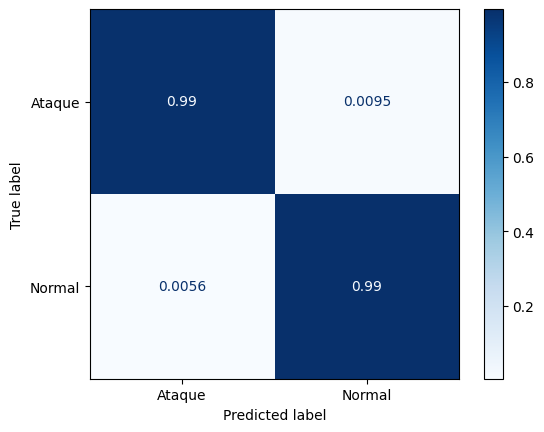

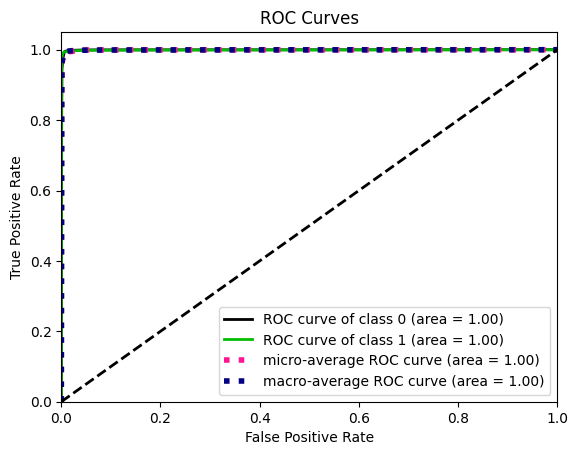

In [13]:
# Start algorithms time PCA/LDA
start_time_lda =  time.time()

# Treinando e avaliando com LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
lda_pred_proba =lda.predict_proba(X_test)

# Registrando no dicionário
dic["LDA"] = accuracy_score(y_true=y_test,y_pred=lda_pred)

# Extraindo o relatório de classificação
reportLda = classification_report(y_true=y_test,y_pred=lda_pred , output_dict=True, digits=4)

# Imprimindo o relatório de reportLda
print("Relatório de Classificação:\n", classification_report(y_true=y_test,y_pred=lda_pred , digits=4))

macro_avg_precision_LDA = reportLda['macro avg']['precision']
print(macro_avg_precision_LDA)

# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=lda_pred, cmap=plt.cm.Blues, 
                                        xticks_rotation='horizontal', display_labels = ['Ataque', 'Normal'], normalize='true')

# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=lda_pred_proba)

# Calcula e imprime a duração do PCA/LDA
end_time_lda = time.time() - start_time_lda
print(f'--- Tempo de execução: {end_time_lda:.2f} segundos ---')

### Classificador Regressão Logística 

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9996    0.9992    0.9994    573924
           1     0.9970    0.9985    0.9977    154049

    accuracy                         0.9990    727973
   macro avg     0.9983    0.9988    0.9986    727973
weighted avg     0.9990    0.9990    0.9990    727973

--- Tempo de execução: 42.30 segundos ---


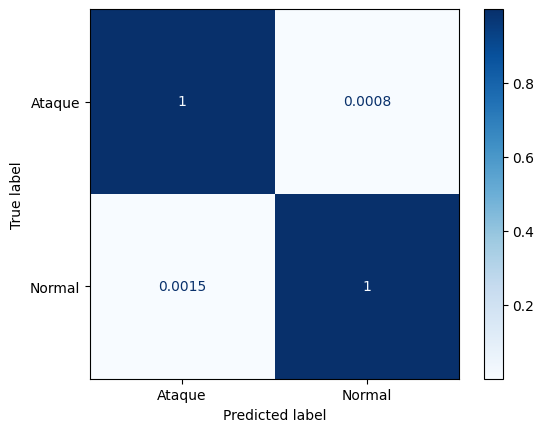

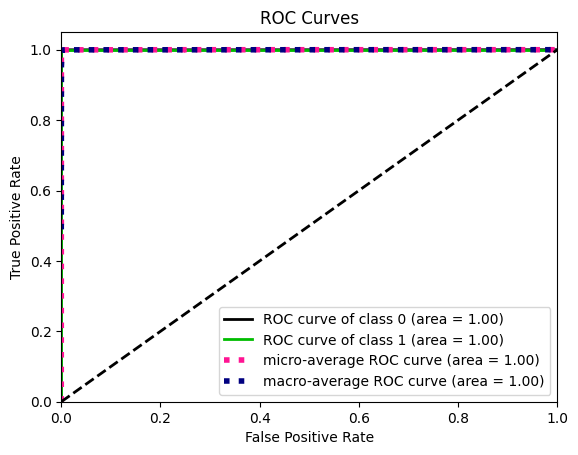

In [14]:
# Start algorithms time PCA/RL
start_time_rl =  time.time()

# Treinando e avaliando com Regressão Logística 
lr = LogisticRegression(max_iter = 300, random_state = seed)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred_proba =lr.predict_proba(X_test)

# Registrando no dicionário
dic["Regressão\nLogistica"] = accuracy_score(y_true=y_test,y_pred=lr_pred)

# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_true=y_test,y_pred=lr_pred , digits=4))

# Plotaando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=lr_pred, 
                                        cmap=plt.cm.Blues, xticks_rotation='horizontal', 
                                        display_labels = ['Ataque', 'Normal'], normalize='true')

# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=lr_pred_proba)

# Calcula e imprime a duração do PCA/RL
end_time_rl = time.time() - start_time_rl
print(f'--- Tempo de execução: {end_time_rl:.2f} segundos ---')

### Classificador KNN

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9999    0.9999    573924
           1     0.9996    0.9998    0.9997    154049

    accuracy                         0.9999    727973
   macro avg     0.9998    0.9998    0.9998    727973
weighted avg     0.9999    0.9999    0.9999    727973

--- Tempo de execução: 943.08 segundos ---


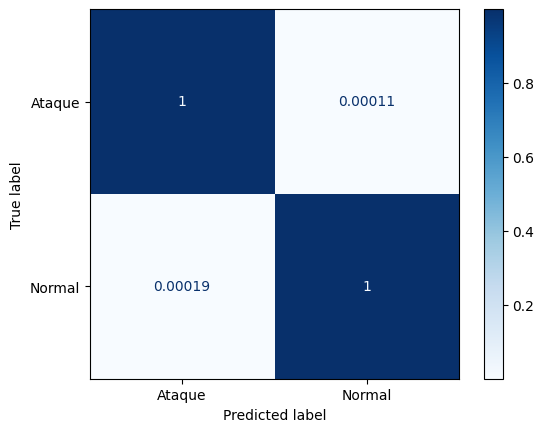

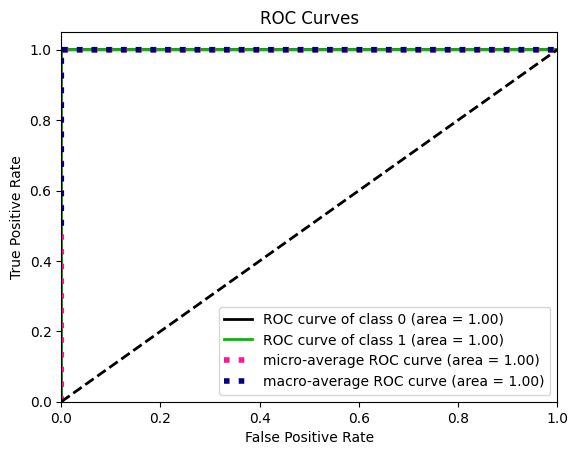

In [15]:
# Start algorithms time PCA/KNN
start_time_knn =  time.time()

# Treinando e avaliando com KNN
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)

# Registrando no dicionário
dic["KNN"] = accuracy_score(y_true=y_test,y_pred=knn_pred)

# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_true=y_test,y_pred=knn_pred, digits=4))

# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=knn_pred, 
                                        cmap=plt.cm.Blues, xticks_rotation='horizontal', 
                                        display_labels = ['Ataque', 'Normal'], normalize='true')

# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=knn_pred_proba)

# Calcula e imprime a duração do PCA/KNN
end_time_knn = time.time() - start_time_knn
print(f'--- Tempo de execução: {end_time_knn:.2f} segundos ---')

### Classificador Árvore de Decisão

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    0.9999    0.9999    573924
           1     0.9995    0.9999    0.9997    154049

    accuracy                         0.9999    727973
   macro avg     0.9997    0.9999    0.9998    727973
weighted avg     0.9999    0.9999    0.9999    727973

--- Tempo de execução: 35.81 segundos ---


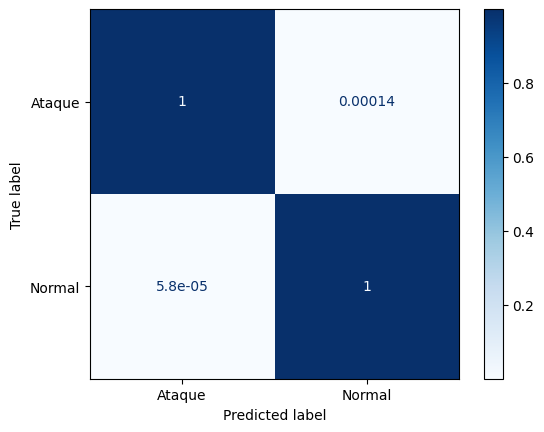

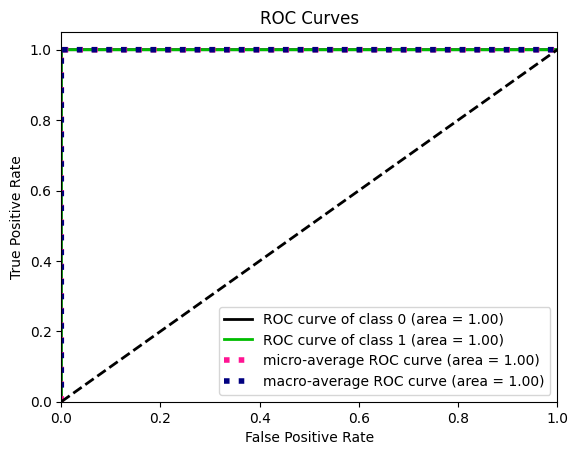

In [16]:
# Start algorithms time PCA/DT
start_time_dt =  time.time()

# Treinando e avaliando com Árvore de Decisão
dt = DecisionTreeClassifier(max_depth = 4, random_state = seed)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)

# Registrando no dicionário
dic['Árvore de\nDecisão'] = accuracy_score(y_true=y_test,y_pred=dt_pred)

# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_true=y_test, y_pred=dt_pred, digits=4))

# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=dt_pred, 
                                        cmap=plt.cm.Blues, xticks_rotation='horizontal', 
                                        display_labels = ['Ataque', 'Normal'], normalize='true')

# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=dt_pred_proba)

# Calcula e imprime a duração do PCA/DT
end_time_dt = time.time() - start_time_dt
print(f'--- Tempo de execução: {end_time_dt:.2f} segundos ---')

### Classificador Random Forest

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    573924
           1     0.9999    1.0000    1.0000    154049

    accuracy                         1.0000    727973
   macro avg     1.0000    1.0000    1.0000    727973
weighted avg     1.0000    1.0000    1.0000    727973

--- Tempo de execução: 902.88 segundos ---


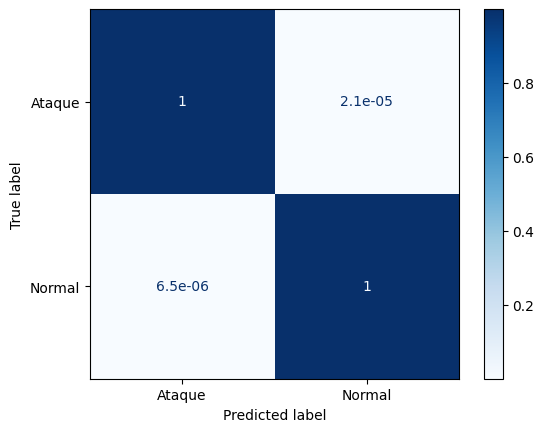

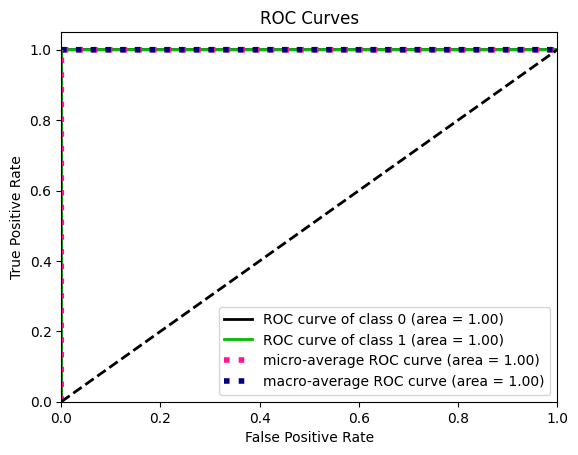

In [17]:
# Start algorithms time PCA/RF
start_time_rf =  time.time()

# Treinando e avaliando com Random Forest
rf = RandomForestClassifier(n_estimators= 100, random_state = seed)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred_proba =rf.predict_proba(X_test)

# Registrando no dicionário
dic["Random\nForest"] = accuracy_score(y_true=y_test, y_pred=rf_pred )

# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_true=y_test, y_pred=rf_pred, digits=4))

# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=rf_pred, 
                                        cmap=plt.cm.Blues, xticks_rotation='horizontal', 
                                        display_labels = ['Ataque', 'Normal'], normalize='true')

# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=rf_pred_proba)

# Calcula e imprime a duração do PCA/RF
end_time_rf = time.time() - start_time_rf
print(f'--- Tempo de execução: {end_time_rf:.2f} segundos ---')

### Classificador Naive Bayes

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9831    0.9996    0.9913    573924
           1     0.9985    0.9360    0.9662    154049

    accuracy                         0.9862    727973
   macro avg     0.9908    0.9678    0.9788    727973
weighted avg     0.9864    0.9862    0.9860    727973

--- Tempo de execução: 10.08 segundos ---


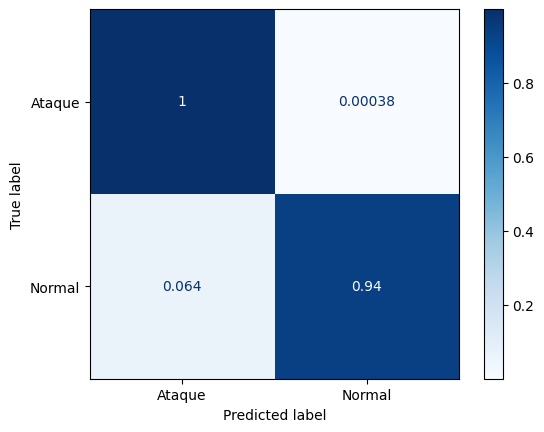

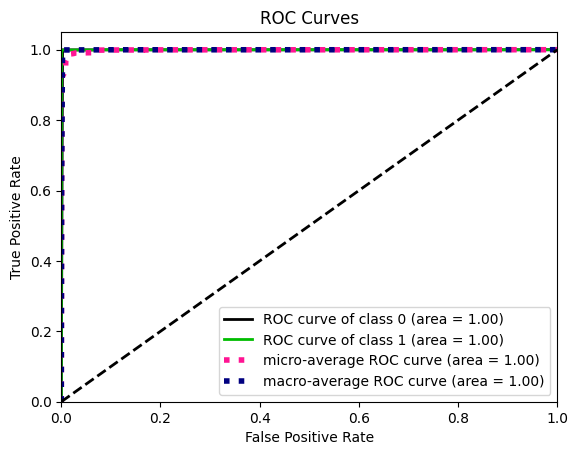

In [18]:
# Start algorithms time PCA/NB
start_time_nb =  time.time()

# Treinando e avaliando com Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_pred_proba = nb.predict_proba(X_test)

# Registrando no dicionário
dic["Naive\nBayes"] = accuracy_score(y_true=y_test, y_pred=nb_pred )

# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_true=y_test, y_pred=nb_pred, digits=4))

# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=nb_pred, 
                                        cmap=plt.cm.Blues, xticks_rotation='horizontal', 
                                        display_labels = ['Ataque', 'Normal'], normalize='true')
# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=nb_pred_proba)

# Calcula e imprime a duração do PCA/NB
end_time_nb = time.time() - start_time_nb
print(f'--- Tempo de execução: {end_time_nb:.2f} segundos ---')

[Text(0, 0, '0.9913'),
 Text(0, 0, '0.9990'),
 Text(0, 0, '0.9999'),
 Text(0, 0, '0.9999'),
 Text(0, 0, '1.0000'),
 Text(0, 0, '0.9862')]

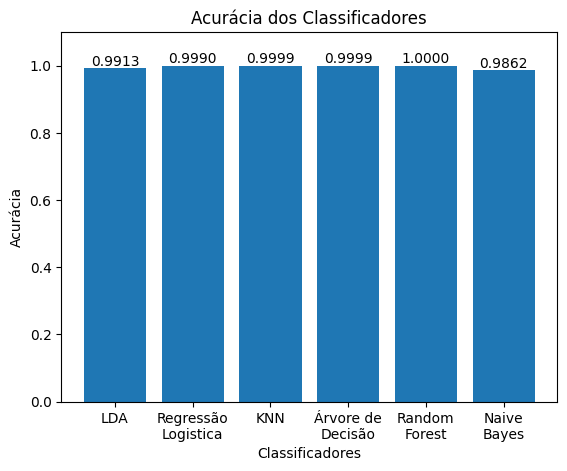

In [19]:
validation = pd.Series(dic, name="Acurácia")
validation

classificadores = dic.keys()
acc = dic.values()

fig, ax = plt.subplots()
bar_container = ax.bar(classificadores, acc)
ax.set(ylabel='Acurácia', xlabel='Classificadores', title='Acurácia dos Classificadores', ylim=(0, 1.1))
ax.bar_label(bar_container, fmt='{:,.4f}')

In [20]:
# Contabiliza o tempo de execução do algoritmo
tempo_total = (time.time() - start_time)
print(f'--- Tempo de execução: {tempo_total:.2f} segundos ---')

--- Tempo de execução: 1968.66 segundos ---


## Avaliação com Cross-Validation

In [21]:
# Start algorithms time
start_time_cv = time.time()

In [22]:
X_cv = scaler

In [23]:
#Dicionário de resultados
dic_cv = {}

In [24]:
# Start algorithms time PCA/LDA_CV
start_time_lda_cv =  time.time()

# Treinando e avaliando com LDA
lda = LinearDiscriminantAnalysis()
acc_lda_cv = cross_val_score(lda, X_cv, y, cv=5, n_jobs=-1)

# Registrando no dicionário
dic_cv["Regressão\nLogistica"] = np.mean(acc_lda_cv)

# Imprimindo acurácias de classificação
print("Acurácias - Logistic Regression: ", acc_lda_cv)
print("Acurácia Final - Logistic Regression: ", np.mean(acc_lda_cv), "+-", np.std(acc_lda_cv))

# Calcula e imprime a duração do PCA/LDA/CV
end_time_lda_cv = time.time() - start_time_lda_cv
print(f'--- Tempo de execução: {end_time_lda_cv:.2f} segundos ---')

Acurácias - Logistic Regression:  [0.97863243 0.99868333 0.997855   0.99259656 0.97527374]
Acurácia Final - Logistic Regression:  0.9886082133351495 +- 0.009800431645814725
--- Tempo de execução: 18.43 segundos ---


In [25]:
# Start algorithms time PCA/RL/CV
start_time_rl_cv =  time.time()

# Treinando e avaliando com regressão logística 
lr = LogisticRegression(max_iter = 300, random_state = seed)
acc_lr_cv = cross_val_score(lr, X_cv, y, cv=5, n_jobs=-1)

# Registrando no dicionário
dic_cv["Regressão\nLogistica"] = np.mean(acc_lr_cv)

# Imprimindo acurácias de classificação
print("Acurácias - Logistic Regression: ", acc_lr_cv)
print("Acurácia Final - Logistic Regression: ", np.mean(acc_lr_cv), "+-", np.std(acc_lr_cv))

# Calcula e imprime a duração do PCA/RL/CV
end_time_rl_cv = time.time() - start_time_rl_cv
print(f'--- Tempo de execução: {end_time_rl_cv:.2f} segundos ---')

Acurácias - Logistic Regression:  [0.9920258  0.99988873 0.99967444 0.99789209 0.99906452]
Acurácia Final - Logistic Regression:  0.9977091163737051 +- 0.002925198565113699
--- Tempo de execução: 48.11 segundos ---


In [26]:
# Start algorithms time PCA/KNN/CV
start_time_knn_cv =  time.time()

# Treinando e avaliando com KNN
knn = KNeighborsClassifier(n_neighbors = 7)
acc_knn_cv = cross_val_score(knn, X_cv, y, cv=5, n_jobs=-1)

# Registrando no dicionário
dic_cv["KNN"] = np.mean(acc_knn_cv)

# Imprimindo acurácias de classificação
print("Acurácias - KNN: ", acc_knn_cv)
print("Acurácia Final - KNN: ", np.mean(acc_knn_cv), "+-", np.std(acc_knn_cv))

# Calcula e imprime a duração do PCA/KNN/CV
end_time_knn_cv = time.time() - start_time_knn_cv
print(f'--- Tempo de execução: {end_time_knn_cv:.2f} segundos ---')

Acurácias - KNN:  [0.99725333 0.99997115 0.99986813 0.99967856 0.992578  ]
Acurácia Final - KNN:  0.9978698340574683 +- 0.002830681011403455
--- Tempo de execução: 526.43 segundos ---


In [27]:
# Start algorithms time PCA/DT/CV
start_time_dt_cv =  time.time()

# Treinando e avaliando com árvore de decisão
dt = DecisionTreeClassifier(max_depth = 4, random_state = seed)
acc_dt_cv = cross_val_score(dt, X_cv, y, cv=5, n_jobs=-1)

# Registrando no dicionário
dic_cv['Árvore de\nDecisão'] =  np.mean(acc_dt_cv)

# Imprimindo acurácias de classificação
print("Acurácias - Árvore de Decisão: ", acc_dt_cv)
print("Acurácia Final - Árvore de Decisão: ", np.mean(acc_dt_cv), "+-", np.std(acc_dt_cv))

# Calcula e imprime a duração do PCA/DT/CV
end_time_dt_cv = time.time() - start_time_dt_cv
print(f'--- Tempo de execução: {end_time_lda_cv:.2f} segundos ---')

Acurácias - Árvore de Decisão:  [0.99917579 0.99997733 0.9996971  0.9989718  0.9985597 ]
Acurácia Final - Árvore de Decisão:  0.9992763456969991 +- 0.0005069256419951805
--- Tempo de execução: 18.43 segundos ---


In [28]:
# Start algorithms time PCA/RF/CV
start_time_rf_cv =  time.time()

# Treinando uma floresta aleatória
rf = RandomForestClassifier(n_estimators= 100, random_state = seed)
acc_rf_cv = cross_val_score(rf, X_cv, y, cv=5, n_jobs=-1)

# Avaliando a florest aleatória e anotando no dicionário
dic_cv["Random\nForest"] = np.mean(acc_rf_cv)

# Imprimindo acurácias de classificação
print("Acurácias - Random Forest: ", acc_rf_cv)
print("Acurácia Final - Random Forest: ", np.mean(acc_rf_cv), "+-", np.std(acc_rf_cv))

# Calcula e imprime a duração do PCA/LDA/CV
end_time_rf_cv = time.time() - start_time_rf_cv
print(f'--- Tempo de execução: {end_time_rf_cv:.2f} segundos ---')

Acurácias - Random Forest:  [0.99935918 1.         0.99999588 0.99994849 0.9986483 ]
Acurácia Final - Random Forest:  0.9995903685846503 +- 0.0005294206930643154
--- Tempo de execução: 1129.42 segundos ---


In [29]:
# Start algorithms time PCA/NB/CV
start_time_nb_cv =  time.time()

# Treinando com Naive Bayes
nb = GaussianNB()
acc_nb_cv = cross_val_score(nb, X_cv, y, cv=5, n_jobs=-1)

#Avaliando o Naive Bayes e anotando no dicionário
dic_cv["Naive\nBayes"] = np.mean(acc_nb_cv)

# Imprimindo acurácias de classificação
print("Acurácias - Naive Bayes: ", acc_nb_cv)
print("Acurácia Final - Naive Bayes: ", np.mean(acc_nb_cv), "+-", np.std(acc_nb_cv))

# Calcula e imprime a duração do PCA/LDA/CV
end_time_nb_cv = time.time() - start_time_nb_cv
print(f'--- Tempo de execução: {end_time_nb_cv:.2f} segundos ---')

Acurácias - Naive Bayes:  [0.90124352 0.99939833 0.99905834 0.99701431 0.935755  ]
Acurácia Final - Naive Bayes:  0.9664939001493857 +- 0.04068693132426318
--- Tempo de execução: 6.84 segundos ---


[Text(0, 0, '0.9977'),
 Text(0, 0, '0.9979'),
 Text(0, 0, '0.9993'),
 Text(0, 0, '0.9996'),
 Text(0, 0, '0.9665')]

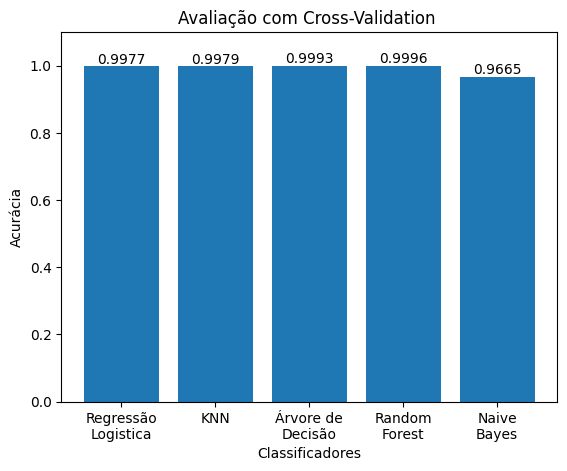

In [30]:
validation2 = pd.Series(dic_cv, name="Acurácia")
validation2

classif = dic_cv.keys()
acc_cv = dic_cv.values()

fig, ax = plt.subplots()
bar_container = ax.bar(classif, acc_cv)
ax.set(ylabel='Acurácia', xlabel='Classificadores', title='Avaliação com Cross-Validation ', ylim=(0, 1.1))
ax.bar_label(bar_container, fmt='{:,.4f}')

In [31]:
# Contabiliza o tempo de execução do algoritmo
end_time_cv = (time.time() - start_time_cv)
print(f'--- Tempo de execução: {end_time_cv:.2f} segundos ---')

--- Tempo de execução: 1770.60 segundos ---
